In [1]:
import pandas as pd

 https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
<br> explains what each column represents
<br> TLC = Taxi and Limousine Commission

# Read Data

In [2]:
# look at size of dataframe (7433139, 18)
pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-04.csv').shape

(7433139, 18)

In [4]:
pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-04.csv').iloc[[0]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-04-01 00:04:09,2019-04-01 00:06:35,1,0.5,1,N,239,239,1,4.0,3.0,0.5,1.0,0.0,0.3,8.8,2.5


## Pickle DataFrame
**Do this only once**

In [2]:
import pickle
import random

In [14]:
n_observations = 7433139 - 1
n_keep = 1000000
trip_data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-04.csv',
                        skiprows = random.sample(range(1, n_observations+1), n_observations-n_keep)) 
#creates range object of indices then randomly samples all indices but 1,000,000 observations' that will be skipped
#using n_observations+1 in range because pandas includes last index but range will skip the last one initially
#starting at 1 to avoid skipping first row, which is column names

#file name:
taxi_data_file_name = 'april_2019_yellow_taxi_data'

In [15]:
#save dataframe:
with open(taxi_data_file_name, 'wb') as f:
    pickle.dump(trip_data, f)

## Load DataFrame

In [4]:
#file name:
taxi_data_file_name = 'april_2019_yellow_taxi_data'

In [5]:
with open(taxi_data_file_name, 'rb') as f:
    trip_data = pickle.load(f)

# Preview Data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
trip_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-04-01 00:38:35,2019-04-01 00:49:10,2,3.39,1,N,237,42,2,11.5,0.5,0.5,0.00,0.0,0.3,15.30,2.5
1,1,2019-04-01 00:07:54,2019-04-01 00:13:44,1,1.50,1,N,25,181,1,7.0,0.5,0.5,1.00,0.0,0.3,9.30,0.0
2,1,2019-04-01 00:58:07,2019-04-01 01:02:39,1,0.90,1,N,48,170,2,5.0,3.0,0.5,0.00,0.0,0.3,8.80,2.5
3,2,2019-04-01 00:04:10,2019-04-01 00:11:58,1,1.31,1,N,238,236,2,7.5,0.5,0.5,0.00,0.0,0.3,11.30,2.5
4,2,2019-04-01 00:59:32,2019-04-01 01:18:53,2,5.02,1,N,148,142,1,18.0,0.5,0.5,4.36,0.0,0.3,26.16,2.5


In [8]:
list(trip_data.columns)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge']

In [17]:
# VendorID - TPEP provider - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
# tpep_pickup_datetime - 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
# tpep_dropoff_datetime - The date and time when the meter was disengaged.
# passenger_count - The number of passengers in the vehicle.
# trip_distance - The elapsed trip distance in miles reported by the taximeter.
# RatecodeID - TLC Taxi Zone in which the taximeter was engaged
# store_and_fwd_flag - TLC Taxi Zone in which the taximeter was disengaged 
# PULocationID
# DOLocationID
# payment_type
# fare_amount
# extra
# mta_tax
# tip_amount
# tolls_amount
# improvement_surcharge
# total_amount
# congestion_surcharge

In [9]:
trip_data.shape # 1,000,001 rows, 18 columns

(1000001, 18)

## Check for empty/NaN/null values

In [10]:
trip_data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

## Preview values of each column - how much is usually charged? About how much would people tip?

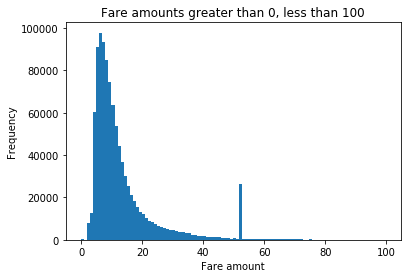

In [13]:
plt.hist(trip_data['fare_amount'][(trip_data['fare_amount'] < 100) & (trip_data['fare_amount'] > 0)],
         bins = 100);

plt.title('Fare amounts greater than 0, less than 100')
plt.xlabel('Fare amount')
plt.ylabel('Frequency')

plt.show()
# there are some outrageous values

Text(0, 0.5, 'Frequency')

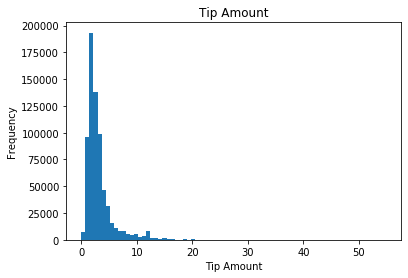

In [14]:
plt.hist(trip_data['tip_amount'][(trip_data['tip_amount'] < 55) & (trip_data['tip_amount'] > 0)],
         bins = 75);

plt.title('Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

#there are some outrageous values

In [15]:
(trip_data.tip_amount/trip_data.fare_amount > .25).sum()

408899

In [16]:
(trip_data.tip_amount > 5).sum()

84560

In [17]:
trip_data['tip_amount'].describe()

count    1.000001e+06
mean     2.210692e+00
std      2.789485e+00
min     -1.860000e+00
25%      0.000000e+00
50%      1.950000e+00
75%      2.960000e+00
max      4.408000e+02
Name: tip_amount, dtype: float64

In [18]:
trip_data['tip_amount'].sort_values(ascending = False)[0:10]

519322    440.80
492047    333.20
844279    250.08
526255    222.00
850029    208.17
175486    150.00
702933    148.88
380610    145.06
433837    119.98
437170    111.16
Name: tip_amount, dtype: float64

## Datetime the dates & times

In [19]:
import datetime
import numpy as np

In [20]:
trip_data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [21]:
#How to get datetime format from given format
datetime.datetime.fromisoformat(trip_data.tpep_pickup_datetime[0])

datetime.datetime(2019, 4, 1, 0, 38, 35)

In [22]:
#function for one input to get hour and time
def hour_from_iso(string_here):
    return datetime.datetime.fromisoformat(string_here).hour

def datetime_from_iso(string_here):
    return datetime.datetime.fromisoformat(string_here)

In [23]:
#Create new column for pick up hour
trip_data['pickup_hour'] = trip_data['tpep_pickup_datetime'].apply(hour_from_iso)


In [24]:
trip_data['pickup_hour'][-5:]

999996     23
999997     23
999998     23
999999     23
1000000    23
Name: pickup_hour, dtype: int64

In [25]:
#Create new column for drop off hour
trip_data['dropoff_hour'] = trip_data['tpep_dropoff_datetime'].apply(hour_from_iso)

In [26]:
trip_data['dropoff_hour'][:5]

0    0
1    0
2    1
3    0
4    1
Name: dropoff_hour, dtype: int64

In [27]:
trip_data['duration'] = trip_data['tpep_dropoff_datetime'].apply(datetime_from_iso) - trip_data['tpep_pickup_datetime'].apply(datetime_from_iso)



In [28]:
trip_data['duration'][:5]

0   00:10:35
1   00:05:50
2   00:04:32
3   00:07:48
4   00:19:21
Name: duration, dtype: timedelta64[ns]

In [29]:
trip_data.duration[0].total_seconds()

635.0

In [30]:
trip_data['duration_s'] = trip_data['duration'].apply(lambda x: x.total_seconds())

In [31]:
trip_data.duration_s[:5]

0     635.0
1     350.0
2     272.0
3     468.0
4    1161.0
Name: duration_s, dtype: float64

In [32]:
trip_data.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,dropoff_hour,duration,duration_s
0,2,2019-04-01 00:38:35,2019-04-01 00:49:10,2,3.39,1,N,237,42,2,...,0.5,0.0,0.0,0.3,15.3,2.5,0,0,00:10:35,635.0
1,1,2019-04-01 00:07:54,2019-04-01 00:13:44,1,1.50,1,N,25,181,1,...,0.5,1.0,0.0,0.3,9.3,0.0,0,0,00:05:50,350.0


## Check linear dependency of variables

In [33]:
trip_data.fare_amount[0] + trip_data.extra[0] + trip_data.mta_tax[0] + trip_data.tip_amount[0] + trip_data.tolls_amount[0] + trip_data.improvement_surcharge[0] + trip_data.congestion_surcharge[0]

15.3

In [34]:
trip_data.total_amount[0]

15.3

In [35]:
print("""total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + 
improvement_surcharge + congestion_surcharge""")
# drop improvement surcharge?

total_amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + 
improvement_surcharge + congestion_surcharge


## Check what to drop

In [36]:
list(trip_data.columns)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'dropoff_hour',
 'duration',
 'duration_s']

In [37]:
trip_data['passenger_count'].value_counts().sort_index(ascending = True) # will need to dummy this

0     18347
1    701121
2    149446
3     42810
4     20642
5     42320
6     25307
7         3
8         5
Name: passenger_count, dtype: int64

In [38]:
trip_data['trip_distance'][trip_data['trip_distance']>50].value_counts().sort_index()
# check to see if people really take taxis for over 50 miles
# they do?
# even the 202.70 miles is real, but was copied an extra 2 times
# 65.20 too

50.10     1
50.75     1
50.90     1
51.04     1
51.82     1
52.06     1
53.21     1
53.32     1
53.66     1
53.70     1
53.73     1
53.90     1
54.30     1
54.76     2
55.35     1
55.42     1
55.80     1
56.19     1
56.50     1
57.10     2
57.30     1
57.88     1
58.62     1
58.80     1
58.95     1
60.90     1
61.02     1
64.70     1
65.55     1
68.09     1
69.57     1
69.60     1
70.50     1
72.31     1
75.65     1
82.88     1
87.60     1
88.96     1
93.00     2
105.55    1
124.89    1
151.28    1
Name: trip_distance, dtype: int64

In [39]:
trip_data['duration'][trip_data['trip_distance'] == 151.28]

423322   02:35:12
Name: duration, dtype: timedelta64[ns]

In [40]:
trip_data['RatecodeID'].value_counts().sort_index() # need to drop 99s

1     965607
2      26212
3       2084
4        811
5       5234
6         12
99        41
Name: RatecodeID, dtype: int64

In [41]:
trip_data['store_and_fwd_flag'].value_counts() # dummy this, or drop?

N    994253
Y      5748
Name: store_and_fwd_flag, dtype: int64

In [42]:
trip_data['PULocationID'].value_counts() # dummy this? 253/252 values...

237    44401
161    42592
236    40034
162    36483
186    34427
       ...  
245        2
251        1
253        1
221        1
2          1
Name: PULocationID, Length: 252, dtype: int64

In [43]:
trip_data['DOLocationID'].value_counts() # dummy this? 261 values...

236    42030
237    39943
161    39312
170    30893
230    30585
       ...  
176        7
59         6
187        5
84         3
99         1
Name: DOLocationID, Length: 259, dtype: int64

In [44]:
trip_data['payment_type'].value_counts() # dummy this

1    719796
2    273238
3      5113
4      1854
Name: payment_type, dtype: int64

In [45]:
trip_data['fare_amount'].value_counts().sort_index() # drop negative values 
# and also drop unreasonably high values

-250.0    1
-125.8    1
-100.0    1
-85.0     1
-80.0     2
         ..
 400.0    3
 403.0    1
 405.0    1
 500.0    1
 572.5    1
Name: fare_amount, Length: 1778, dtype: int64

In [46]:
trip_data['fare_amount'][trip_data['fare_amount'] > 150]
# drop above 150

1642      180.0
7974      170.0
8371      324.0
12241     231.0
14831     165.5
          ...  
985495    176.0
992060    187.0
996041    230.0
996811    151.5
998380    151.0
Name: fare_amount, Length: 262, dtype: float64

In [47]:
trip_data['extra'].value_counts() # $0.50 for rush hour, $1 for overnight
# there are some other values. not sure what they mean

 0.00     343510
 0.50     191990
 2.50     182114
 1.00     114483
 3.00      97212
 3.50      64525
 4.50       3660
 7.00       1612
-0.50        516
-1.00        258
 0.80         31
 1.30         17
 3.73         15
-4.50         14
 2.00         11
 4.96          6
 17.50         6
 1.80          5
-2.00          5
 3.30          2
 18.00         1
 5.00          1
 0.30          1
 5.50          1
 1.23          1
 5.30          1
 2.80          1
 2.46          1
 2.05          1
Name: extra, dtype: int64

In [48]:
trip_data.extra.isna().sum() # bretter drop those NaN values too

0

In [49]:
trip_data['mta_tax'].value_counts() # drop -0.5 and 3.3

 0.5    993041
 0.0      5377
-0.5      1581
 0.9         1
 3.3         1
Name: mta_tax, dtype: int64

In [50]:
#drop surcharge due to collinearity

In [51]:
# tolls_amount
trip_data['tolls_amount'].value_counts().sort_index()

-10.50         1
-6.12         28
-5.00          1
-2.80          1
 0.00     941577
           ...  
 79.25         1
 80.00         1
 95.00         1
 96.12         2
 97.00         1
Name: tolls_amount, Length: 399, dtype: int64

In [52]:
trip_data['duration'][trip_data['tolls_amount'] == 617] # check to see if that $617 outlier is real
# it actually has a chance of being real

Series([], Name: duration, dtype: timedelta64[ns])

In [53]:
# total_amount
trip_data['total_amount'].value_counts().sort_index() # obviously continuous

-253.30    1
-126.60    1
-100.80    1
-88.30     1
-86.92     1
          ..
 468.96    1
 480.35    1
 493.60    1
 514.04    1
 602.52    1
Name: total_amount, Length: 6647, dtype: int64

In [118]:
trip_data['duration'][trip_data['total_amount'] == 3036.29]
# checking to see if that $3k trip was real -> 27 second trip, probably mistake so drop

122512   00:00:27
Name: duration, dtype: timedelta64[ns]

## Drop Plan

In [ ]:
# Planning the cleaning

## 'VendorID', - DROP
## 'tpep_pickup_datetime', - DROP in favor of hour
## 'tpep_dropoff_datetime', - DROP in favor of hour
# 'passenger_count', - DUMMY this
## 'trip_distance', - DROP WHERE distance > 50 AND DURATION.MINUTE < 5
## 'RatecodeID', - DROP 99 THEN DUMMY
## 'store_and_fwd_flag', - DROP, 99.6% are YES and it's not relevant
# 'PULocationID', - DUMMY
# 'DOLocationID', - DUMMY
# 'payment_type', - DUMMY
## 'fare_amount', - DROP < 0 and (> 200 with duration < 1 min)
## 'extra', - DROP negatives AND NaNs
## 'mta_tax', - DROP WHERE NOT EQUAL TO 0 OR 0.5
# 'tip_amount', 
## 'tolls_amount', - DROP negatives
## 'improvement_surcharge',
# 'total_amount',
## 'congestion_surcharge',
# 'pickup_hour',
## 'dropoff_hour', - made this but probably don't need
# 'duration', will keep this in dataframe but not use this, in favor of duration_s
# 'duration_s'

# made a 'good_or_nah' column for good tip or nah

## Just drop

In [57]:
trip_data.drop(columns = ['VendorID', 
                          'improvement_surcharge',
                          'tpep_pickup_datetime',# grabbed the hour from this, which ranged 0-23
                          'tpep_dropoff_datetime',#dropped tpep dropoff datetime to avoid dependency to duration, which we made
                          'dropoff_hour',#made this but probably don't need
                          'store_and_fwd_flag',
                          'congestion_surcharge'],#drop to avoid total's dependency on this
               inplace = True)

In [58]:
trip_data.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'pickup_hour', 'duration',
       'duration_s'],
      dtype='object')

### Drop before dummy ones

In [33]:
# can also do inplace = true

In [59]:
# drop ones where they travelled over 50 miles in less than 5 minutes
# these end up being the accidental copies
trip_data = trip_data.drop(trip_data[(trip_data['trip_distance'] >= 50) & ((trip_data['duration_s'] // 60) < 5)].index)


In [60]:
trip_data = trip_data.drop(trip_data[trip_data['RatecodeID'] == 99].index)

In [61]:
# drop where fare amount is negative
trip_data = trip_data.drop(trip_data[(trip_data['fare_amount'] < 0)].index)

In [62]:
# drop where fare amount is over $200 but the ride was less than a minute
trip_data = trip_data.drop(trip_data[(trip_data['fare_amount'] > 200) & (trip_data['duration_s'] < 60)].index)

In [63]:
# drop negative extra
trip_data['extra'] = trip_data['extra'][trip_data['extra'] >= 0]

In [64]:
# drop NaNs from extra
trip_data.dropna(axis = 0, how = 'any', subset = ['extra'], inplace = True)

In [40]:
# drop whatever mta tax isn't 0 or 0.5

#trip_data = trip_data.drop(trip_data[(trip_data['mta_tax'] != 0) or (trip_data['mta_tax'] != 0.5)].index)

#**don't run this or else the entire dataframe gets deleted for some reason. is it because
#there are no values to drop?**

In [65]:
trip_data.mta_tax.value_counts()

0.5    993003
0.0      5301
0.9         1
Name: mta_tax, dtype: int64

In [66]:
# all negative tolls have been dealt with from above nicely enough

In [67]:
(trip_data.tolls_amount < 0).sum()

0

In [ ]:
# congestion surcharge is dropped or else total would just be a sum of several others

### MAKE GOOD OR NAH COLUMN BEFORE DROPPING TIP AMT

Define what a good tip is as at least 25% of fare<br>
https://www.tripsavvy.com/guide-to-tipping-in-new-york-city-4177115 <br>
says usual tip is 10-20% of fare

In [68]:
# just checking with flat amounts
(trip_data.tip_amount > 3).sum() #242408

232885

In [69]:
trip_data['good_or_nah'] = (trip_data.tip_amount/trip_data.fare_amount) > 0.25

In [73]:
trip_data['good_or_nah'][10:20]

10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18     True
19    False
Name: good_or_nah, dtype: bool

In [74]:
# finally drop tip amount

trip_data.drop(columns = ['tip_amount'], inplace = True)

## Dummies Plan

In [ ]:
# Planning the cleaning
# DOUBLE HASH ONCE PASSED INTO DUMMY COLUMN LIST
## 'VendorID', - DROP
## 'tpep_pickup_datetime', - DROP in favor of hour
## 'tpep_dropoff_datetime', - DROP in favor of hour
## 'passenger_count', - DUMMY this
## 'trip_distance', - DROP WHERE distance > 50 AND DURATION.MINUTE < 5
## 'RatecodeID', - DROP 99 THEN DUMMY
## 'store_and_fwd_flag', - DROP, 99.6% are YES and it's not relevant
## 'PULocationID', - DUMMY
## 'DOLocationID', - DUMMY
## 'payment_type', - DUMMY
## 'fare_amount', - DROP < 0 and (> 200 with duration < 1 min)
## 'extra', - DROP negatives
## 'mta_tax', - DROP WHERE NOT EQUAL TO 0 OR 0.5
## 'tip_amount', - DROPPED AFTER MAKING GOOD OR NAH
## 'tolls_amount', - DROP negatives
## 'improvement_surcharge',
# 'total_amount',
## 'congestion_surcharge',
# 'pickup_hour',
## 'dropoff_hour', - made this but don't need
# 'duration', will keep this in dataframe but not use this, in favor of duration_s
# 'duration_s'

# made a 'good_or_nah' column for good tip or nah

## Get dummies

In [76]:
import pandas as pd

In [77]:
trip_data = pd.get_dummies(data = trip_data, 
               columns = ['passenger_count', 'PULocationID', 'DOLocationID', 'payment_type'],
              drop_first = True)


In [48]:
# Before making dummy variables: 15 columns


In [78]:
# After making dummy variables: 535 columns
# got rid of 4 rows that had NaNs
trip_data.shape # 998507, 535 || 998305, 531

(998305, 531)

## Looking at distribution of the two classes
**Total Number of Good Tips vs. Not Good Tips**

In [79]:
trip_data.shape

(998305, 531)

In [80]:
trip_data.good_or_nah.value_counts() # 572961 False, 425546 True

False    589423
True     408882
Name: good_or_nah, dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

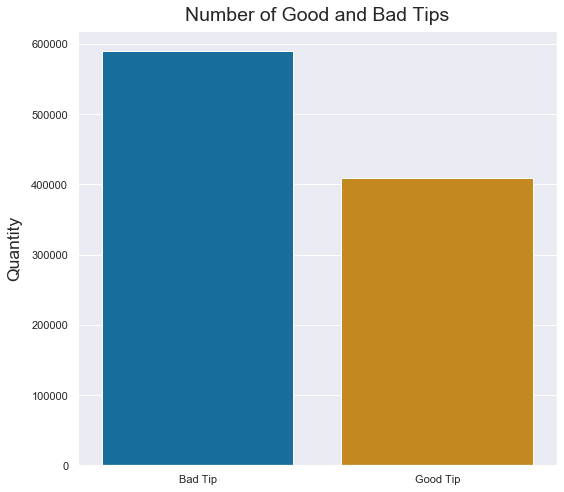

In [26]:
sns.set_style(style = 'darkgrid')
sns.set(rc={'figure.figsize':(8,7)})
plt.rcParams.update({'figure.autolayout': True})


dist_bar = sns.barplot(orient = 'v',
                           y = trip_data.good_or_nah.value_counts(),
                           x = ['Bad Tip', 'Good Tip'],
                           palette = 'colorblind')

dist_bar.axes.set_title('Number of Good and Bad Tips', fontsize = 19.5, pad = 10) # title info
# dist_bar.set_xlabel('Distance', fontsize = 18, labelpad = 10) # xlabel info
dist_bar.set_ylabel('Quantity', fontsize = 17.5, labelpad = 9) # ylabel info

plt.savefig('distr_of_classes')#, transparent = True)

# List of input column names

In [ ]:
# Columns that will not be used: duration
# also take out the dependent variable

In [29]:
inputs = list(trip_data.columns)
inputs.remove('duration')
inputs.remove('good_or_nah')

In [30]:
inputs

['trip_distance',
 'RatecodeID',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'total_amount',
 'pickup_hour',
 'duration_s',
 'passenger_count_1',
 'passenger_count_2',
 'passenger_count_3',
 'passenger_count_4',
 'passenger_count_5',
 'passenger_count_6',
 'passenger_count_7',
 'passenger_count_8',
 'PULocationID_2',
 'PULocationID_3',
 'PULocationID_4',
 'PULocationID_5',
 'PULocationID_6',
 'PULocationID_7',
 'PULocationID_8',
 'PULocationID_9',
 'PULocationID_10',
 'PULocationID_11',
 'PULocationID_12',
 'PULocationID_13',
 'PULocationID_14',
 'PULocationID_15',
 'PULocationID_16',
 'PULocationID_17',
 'PULocationID_18',
 'PULocationID_19',
 'PULocationID_20',
 'PULocationID_21',
 'PULocationID_22',
 'PULocationID_23',
 'PULocationID_24',
 'PULocationID_25',
 'PULocationID_26',
 'PULocationID_27',
 'PULocationID_28',
 'PULocationID_29',
 'PULocationID_31',
 'PULocationID_32',
 'PULocationID_33',
 'PULocationID_34',
 'PULocationID_35',
 'PULocationID_36',
 'PULocationID_3

# Pickle before splitting data
Random State = 52 for repeatable splits

In [91]:
# save 

taxi_data_file_name2 = 'cleaned_taxi_data'

with open(taxi_data_file_name2, 'wb') as f:
    pickle.dump(trip_data, f)

In [27]:
# load

taxi_data_file_name2 = 'cleaned_taxi_data'

with open(taxi_data_file_name2, 'rb') as f:
    trip_data = pickle.load(f)

In [28]:
trip_data

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration,duration_s,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
0,3.39,1,11.5,0.5,0.5,0.0,15.30,0,00:10:35,635.0,...,0,0,0,0,0,0,0,1,0,0
1,1.50,1,7.0,0.5,0.5,0.0,9.30,0,00:05:50,350.0,...,0,0,0,0,0,0,0,0,0,0
2,0.90,1,5.0,3.0,0.5,0.0,8.80,0,00:04:32,272.0,...,0,0,0,0,0,0,0,1,0,0
3,1.31,1,7.5,0.5,0.5,0.0,11.30,0,00:07:48,468.0,...,0,0,0,0,0,0,0,1,0,0
4,5.02,1,18.0,0.5,0.5,0.0,26.16,0,00:19:21,1161.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,5.94,1,20.0,0.5,0.5,0.0,26.80,23,00:16:48,1008.0,...,0,0,0,0,0,0,0,0,0,0
999997,0.93,1,5.5,0.5,0.5,0.0,9.30,23,00:04:31,271.0,...,0,0,0,0,0,0,0,1,0,0
999998,1.50,1,7.0,3.0,0.5,0.0,10.80,23,00:06:02,362.0,...,0,0,0,0,0,0,0,1,0,0
999999,1.55,1,8.5,0.5,0.5,0.0,15.99,23,00:09:14,554.0,...,0,0,0,0,0,0,0,0,0,0


# Split Data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(trip_data[inputs], 
                                                    trip_data['good_or_nah'], 
                                                    random_state = 52)

## Check data after splitting

In [33]:
y_train.shape # (748880,) ||| (748728,)

(748728,)

In [34]:
x_train.shape # (748880, 533) ||| (748728, 529)

(748728, 529)

In [35]:
x_test.shape # (249627, 533) ||| (249577, 529)

(249577, 529)

In [36]:
y_test.shape # (249627,) ||| (249577,)

(249577,)

## How bad is the class imbalance?

In [37]:
# percentage of trips that give good tips: 0.426, not much class imbalance
trip_data['good_or_nah'].mean()

0.4095762317127531

# Balancing classes

In [38]:
from sklearn.utils import resample

## Combine x_train to y_train again to resample from them

In [39]:
merged = pd.concat([x_train, y_train], axis = 1)

In [40]:
n_good = (merged['good_or_nah'] == 1).sum()

In [41]:
n_nah = (merged['good_or_nah'] == 0).sum()

In [42]:
n_good # 319091 ||| 306446

306446

In [43]:
n_nah # 429789 ||| 442282

442282

In [44]:
merged.shape # (748880, 534)

(748728, 530)

In [45]:
# random state = 52 for repeatable results
up_the_good = resample(merged[merged['good_or_nah'] == 1], 
                       n_samples = n_nah, 
                       random_state = 52)

In [46]:
up_the_good.shape # now up_the_good has same number as n_nah (429789, 534)

(442282, 530)

In [47]:
nah = merged[merged['good_or_nah'] == 0]

In [48]:
train_set = pd.concat([up_the_good, nah], axis = 0)

In [49]:
y_train = train_set['good_or_nah']
ind_vars = list(train_set.columns)
ind_vars.remove('good_or_nah')
x_train = train_set[ind_vars]


In [50]:
x_train.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
555561,1.20,1,6.5,2.5,0.5,0.0,11.76,7,375.0,1,...,0,0,0,0,0,0,0,0,0,0
581556,3.30,1,14.0,3.0,0.5,0.0,21.35,20,936.0,0,...,0,0,0,0,0,0,0,0,0,0
409468,1.00,1,5.0,0.5,0.5,0.0,10.56,20,215.0,1,...,0,0,0,0,0,0,0,0,0,0
224874,0.88,1,6.5,0.0,0.5,0.0,12.74,11,446.0,1,...,0,0,0,0,0,0,0,0,0,0
750617,0.68,1,7.0,0.0,0.5,0.0,12.36,13,504.0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_train.head()

555561    True
581556    True
409468    True
224874    True
750617    True
Name: good_or_nah, dtype: bool

In [52]:
y_train.shape[0]/y_train.sum() # check for equal number of good and nahs

2.0

# Scale Data
Important for convergence on logistic regression when applying l1 and l2 penalties

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
minmax = MinMaxScaler()

In [55]:
x_train.shape # 859578, 533

(884564, 529)

In [56]:
x_train.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
555561,1.20,1,6.5,2.5,0.5,0.0,11.76,7,375.0,1,...,0,0,0,0,0,0,0,0,0,0
581556,3.30,1,14.0,3.0,0.5,0.0,21.35,20,936.0,0,...,0,0,0,0,0,0,0,0,0,0
409468,1.00,1,5.0,0.5,0.5,0.0,10.56,20,215.0,1,...,0,0,0,0,0,0,0,0,0,0
224874,0.88,1,6.5,0.0,0.5,0.0,12.74,11,446.0,1,...,0,0,0,0,0,0,0,0,0,0
750617,0.68,1,7.0,0.0,0.5,0.0,12.36,13,504.0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
minmax.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [58]:
the_cols = list(x_test.columns)
the_cols[:5]

['trip_distance', 'RatecodeID', 'fare_amount', 'extra', 'mta_tax']

In [59]:
x_train = minmax.transform(x_train)

In [60]:
x_train = pd.DataFrame(x_train, columns = the_cols)
x_train.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
0,0.007932,0.0,0.013,0.138889,0.555556,0.0,0.022878,0.304348,0.004341,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.021814,0.0,0.028,0.166667,0.555556,0.0,0.041534,0.869565,0.010834,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006610,0.0,0.010,0.027778,0.555556,0.0,0.020543,0.869565,0.002489,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005817,0.0,0.013,0.000000,0.555556,0.0,0.024784,0.478261,0.005162,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004495,0.0,0.014,0.000000,0.555556,0.0,0.024045,0.565217,0.005834,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
x_train.shape

(884564, 529)

In [62]:
x_test.shape

(249577, 529)

In [63]:
x_test = minmax.transform(x_test)

In [64]:
x_test = pd.DataFrame(x_test, columns = the_cols)

In [65]:
x_test.shape

(249577, 529)

In [66]:
x_test.head()

,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,total_amount,pickup_hour,duration_s,passenger_count_1,...,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,payment_type_2,payment_type_3,payment_type_4
0,0.011039,0.0,0.019,0.027778,0.555556,0.0,0.031048,1.000000,0.008542,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.018377,0.0,0.024,0.000000,0.555556,0.0,0.029764,0.521739,0.009283,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.011700,0.0,0.019,0.027778,0.555556,0.0,0.031048,0.956522,0.007188,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005949,0.0,0.012,0.138889,0.555556,0.0,0.021691,0.434783,0.003982,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.014543,0.0,0.023,0.194444,0.555556,0.0,0.032682,0.826087,0.010811,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create Models

## Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logreg = LogisticRegression(penalty = 'l2',
                             class_weight = 'balanced', 
                             solver = 'saga', 
                             max_iter = 250, 
                             verbose = 1,
                             n_jobs = -1)

In [69]:
logreg.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 35 epochs took 397 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.6min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=250, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [70]:
log_pred = logreg.predict(x_test)

In [71]:
#### l1 penalty

In [72]:
logreg2 = LogisticRegression(penalty = 'l1',
                             class_weight = 'balanced', 
                             solver = 'saga', 
                             max_iter = 250, 
                             verbose = 1,
                             n_jobs = -1)

In [73]:
logreg2.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 2838 seconds


C:\Users\gl127\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 47.3min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=250, multi_class='auto', n_jobs=-1, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=1,
                   warm_start=False)

In [74]:
log_pred2 = logreg2.predict(x_test)

## Evaluate Logistic Regression Model

In [75]:
from sklearn.metrics import accuracy_score, f1_score

In [76]:
### ============================ l2 penalty

In [77]:
accuracy_score(y_test, log_pred) 

0.8034875008514406

In [78]:
f1_score(y_test, log_pred)

0.8007102832599888

In [79]:
### ============================ l1 penalty

In [80]:
accuracy_score(y_test, log_pred2) 

0.917524451371721

In [81]:
f1_score(y_test, log_pred2) 

0.9054608919303726

## Random Forest Model

### Create objects to test hyperparameters

random_state = 52 to get reproduceable results

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(random_state = 52, n_jobs = -1, class_weight = 'balanced')

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
params_to_test = {'n_estimators': [10, 20, 30]#[100,300,500], #this took too long and crashed after several hours so decrease the number
#                   'max_depth': [5,10,15,20, None],
                  }

In [86]:
grid = GridSearchCV(estimator = rf, 
                    param_grid = params_to_test, 
                    scoring = 'f1',
                    n_jobs = -1,
                    cv = 2,
                    verbose = 1)

In [87]:
grid.fit(X = x_train, y = y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  5.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=52,
                              

In [88]:
grid.best_params_

{'n_estimators': 30}

In [89]:
# results for 10,20,30 estimators
grid.cv_results_

{'mean_fit_time': array([125.43172336, 163.79663014, 155.57320738]),
 'std_fit_time': array([1.96373582, 2.06198645, 0.10970616]),
 'mean_score_time': array([19.09293711, 20.03941977,  7.36031866]),
 'std_score_time': array([1.4969815 , 4.8649925 , 0.63630033]),
 'param_n_estimators': masked_array(data=[10, 20, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}],
 'split0_test_score': array([0.95193024, 0.9550916 , 0.95712431]),
 'split1_test_score': array([0.95082636, 0.95484996, 0.95614625]),
 'mean_test_score': array([0.9513783 , 0.95497078, 0.95663528]),
 'std_test_score': array([0.00055194, 0.00012082, 0.00048903]),
 'rank_test_score': array([3, 2, 1])}

In [45]:
# results for 10, 20, 30 estimators in the forest
grid.cv_results_

{'mean_fit_time': array([118.12381303, 159.62323451, 145.49761808]),
 'std_fit_time': array([0.90849698, 0.06214237, 0.16729987]),
 'mean_score_time': array([32.53246105, 26.43195534, 14.35073793]),
 'std_score_time': array([0.18373287, 0.13097954, 0.11526906]),
 'param_n_estimators': masked_array(data=[10, 20, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}],
 'split0_test_score': array([0.9498536 , 0.9553242 , 0.95615397]),
 'split1_test_score': array([0.94656946, 0.95103802, 0.9534162 ]),
 'mean_test_score': array([0.94821153, 0.95318111, 0.95478508]),
 'std_test_score': array([0.00164207, 0.00214309, 0.00136888]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

### Optimizing for accuracy

In [255]:
grid2 = GridSearchCV(estimator = rf, 
                     param_grid = params_to_test, 
                     scoring = 'accuracy',
                     n_jobs = -1,
                     cv = 2,
                     verbose = 1)

In [256]:
grid2.fit(X = x_train, y = y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.5min finished
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.5min remaining:    0.0s


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=52,
                              

In [257]:
grid2.cv_results_ # same results, 30 estimators is best out of 10,20,30

{'mean_fit_time': array([159.55684507, 205.95349705, 175.7021656 ]),
 'std_fit_time': array([1.49923313, 2.09471095, 0.18153644]),
 'mean_score_time': array([33.74942458, 31.22780895, 13.29429841]),
 'std_score_time': array([0.64995348, 0.52250791, 0.42292643]),
 'param_n_estimators': masked_array(data=[10, 20, 30],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 30}],
 'split0_test_score': array([0.94947288, 0.95478014, 0.9555689 ]),
 'split1_test_score': array([0.94601537, 0.95028956, 0.95267678]),
 'mean_test_score': array([0.94774413, 0.95253485, 0.95412284]),
 'std_test_score': array([0.00172876, 0.00224529, 0.00144606]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

### Create object using best of the selected

In [94]:
rf_train_only = RandomForestClassifier(n_estimators = 30, 
                                       random_state = 52, 
                                       n_jobs = -1, 
                                       class_weight = 'balanced')

In [95]:
rf_train_only.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

## Save Random Forest Model

In [96]:
# save 

rf_taxi_model_name = 'rf_taxi_model'

with open(rf_taxi_model_name, 'wb') as f:
    pickle.dump(rf_train_only, f)

In [97]:
# load

rf_taxi_model_name = 'rf_taxi_model'

with open(rf_taxi_model_name, 'rb') as f:
    rf_train_only = pickle.load(f)

### Feature importance with everything split

In [98]:
importances = rf_train_only.feature_importances_

In [99]:
len(importances)

529

In [100]:
inputs;
len(inputs)

529

In [101]:
sorted_impor = sorted(zip(inputs,importances), key = lambda x: x[1], reverse = True)
sorted_impor[:20]

[('total_amount', 0.2618370178300444),
 ('payment_type_2', 0.23867721618929688),
 ('fare_amount', 0.12984912708386276),
 ('duration_s', 0.09122868878156697),
 ('trip_distance', 0.07656845367649641),
 ('pickup_hour', 0.03390488058940655),
 ('extra', 0.01807824402638501),
 ('tolls_amount', 0.008088733346871164),
 ('passenger_count_1', 0.004935035313263864),
 ('passenger_count_2', 0.003806773694466318),
 ('payment_type_3', 0.003414610667338159),
 ('PULocationID_132', 0.003046547279867268),
 ('PULocationID_138', 0.0028705045096410523),
 ('RatecodeID', 0.002795919025282604),
 ('DOLocationID_138', 0.002061714100766088),
 ('passenger_count_3', 0.0020242299216167406),
 ('passenger_count_5', 0.001905242913658049),
 ('PULocationID_237', 0.001534310891648),
 ('PULocationID_236', 0.00147218589093491),
 ('DOLocationID_236', 0.001401364058736331)]

### Find importance of each categorical feature

In [57]:
passenger_start = inputs.index('passenger_count_1')
passenger_end = inputs.index('passenger_count_9')

pickup_loc_start = inputs.index('PULocationID_2')
pickup_loc_end = inputs.index('PULocationID_265')

dropoff_loc_start = inputs.index('DOLocationID_2')
dropoff_loc_end = inputs.index('DOLocationID_265')

pay_start = inputs.index('payment_type_2')
pay_end = inputs.index('payment_type_4')

In [59]:
import numpy as np

In [251]:
def eu_norm(importances):
    """finds the euclidean norm of a vector or array, calculated as
    the square root of the sum of squares of each element"""
    return np.sqrt((importances**2).sum())

In [74]:
n_passengers_importance = eu_norm(importances[passenger_start : passenger_end])
n_passengers_importance

0.006580444420434989

In [75]:
pickup_loc_importance = eu_norm(importances[pickup_loc_start : pickup_loc_end])
pickup_loc_importance

0.008428068716357739

In [76]:
dropoff_loc_importance = eu_norm(importances[dropoff_loc_start : dropoff_loc_end])
dropoff_loc_importance

0.006737459539417845

In [77]:
pay_type_importance = eu_norm(importances[pay_start : pay_end])
pay_type_importance

0.22658663179634014

In [79]:
importances[passenger_start : passenger_end].sum(), importances[pay_start : pay_end].sum()

(0.014380278683751956, 0.22965484908520345)

In [80]:
inputs

['trip_distance',
 'RatecodeID',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'total_amount',
 'pickup_hour',
 'duration_s',
 'passenger_count_1',
 'passenger_count_2',
 'passenger_count_3',
 'passenger_count_4',
 'passenger_count_5',
 'passenger_count_6',
 'passenger_count_7',
 'passenger_count_8',
 'passenger_count_9',
 'PULocationID_2',
 'PULocationID_3',
 'PULocationID_4',
 'PULocationID_5',
 'PULocationID_6',
 'PULocationID_7',
 'PULocationID_8',
 'PULocationID_9',
 'PULocationID_10',
 'PULocationID_11',
 'PULocationID_12',
 'PULocationID_13',
 'PULocationID_14',
 'PULocationID_15',
 'PULocationID_16',
 'PULocationID_17',
 'PULocationID_18',
 'PULocationID_19',
 'PULocationID_20',
 'PULocationID_21',
 'PULocationID_22',
 'PULocationID_23',
 'PULocationID_24',
 'PULocationID_25',
 'PULocationID_26',
 'PULocationID_27',
 'PULocationID_28',
 'PULocationID_29',
 'PULocationID_31',
 'PULocationID_32',
 'PULocationID_33',
 'PULocationID_34',
 'PULocationID_35',
 'PULocationID

In [83]:
continuous_impor = list(zip(inputs[0:passenger_start], importances[0:passenger_start]))
continuous_impor

[('trip_distance', 0.08324134261903572),
 ('RatecodeID', 0.005071645231988823),
 ('fare_amount', 0.124924497814652),
 ('extra', 0.017282553969087844),
 ('mta_tax', 0.0009162257639064709),
 ('tolls_amount', 0.0067497298896805145),
 ('total_amount', 0.26025267169986244),
 ('pickup_hour', 0.03867859270086176),
 ('duration_s', 0.10279784960592696)]

In [84]:
categor_impor = [('n_passengers', n_passengers_importance),
                 ('pickup_loc', pickup_loc_importance),
                 ('dropoff_loc', dropoff_loc_importance),
                 ('payment_type', pay_type_importance)]

[('n_passengers', 0.006580444420434989),
 ('pickup_loc', 0.008428068716357739),
 ('dropoff_loc', 0.006737459539417845),
 ('payment_type', 0.22658663179634014)]

In [89]:
all_importance = []
all_importance.extend(continuous_impor)
all_importance.extend(categor_impor)
sorted(all_importance, key = lambda x: x[1], reverse = True)

[('total_amount', 0.26025267169986244),
 ('payment_type', 0.22658663179634014),
 ('fare_amount', 0.124924497814652),
 ('duration_s', 0.10279784960592696),
 ('trip_distance', 0.08324134261903572),
 ('pickup_hour', 0.03867859270086176),
 ('extra', 0.017282553969087844),
 ('pickup_loc', 0.008428068716357739),
 ('tolls_amount', 0.0067497298896805145),
 ('dropoff_loc', 0.006737459539417845),
 ('n_passengers', 0.006580444420434989),
 ('RatecodeID', 0.005071645231988823),
 ('mta_tax', 0.0009162257639064709)]

In [ ]:
# Decided to not combine each category when viewing feature importances

In [102]:
unzipped_fi = list(zip(*sorted_impor[:10])) # unzipped sorted feature importances top 10
unzipped_fi[0] = list(map(lambda x: x.title(), unzipped_fi[0]))
unzipped_fi

[['Total_Amount',
  'Payment_Type_2',
  'Fare_Amount',
  'Duration_S',
  'Trip_Distance',
  'Pickup_Hour',
  'Extra',
  'Tolls_Amount',
  'Passenger_Count_1',
  'Passenger_Count_2'],
 (0.2618370178300444,
  0.23867721618929688,
  0.12984912708386276,
  0.09122868878156697,
  0.07656845367649641,
  0.03390488058940655,
  0.01807824402638501,
  0.008088733346871164,
  0.004935035313263864,
  0.003806773694466318)]

### Plot feature importance

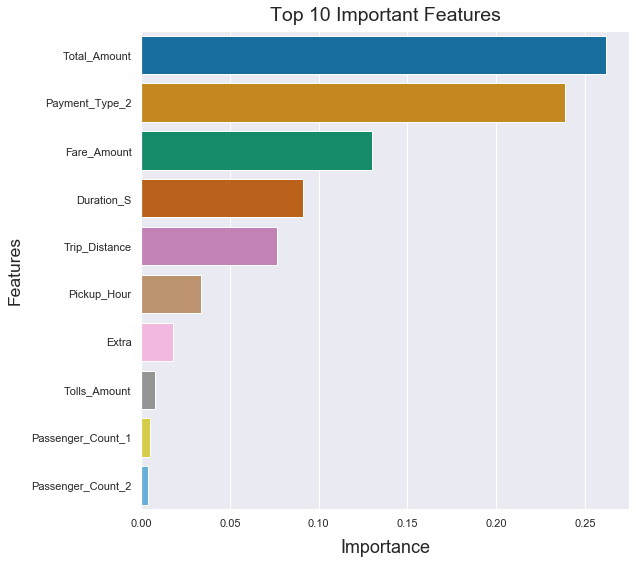

In [103]:
sns.set_style(style = 'darkgrid')
sns.set(rc = {'figure.figsize':(9,8)}) # change graph size

fi_bar = sns.barplot(orient = 'h', 
                     y = unzipped_fi[0], 
                     x = list(unzipped_fi[1]),
                     palette = 'colorblind')

fi_bar.axes.set_title('Top 10 Important Features', fontsize = 19.5, pad = 10) # title info
fi_bar.set_xlabel('Importance', fontsize = 18, labelpad = 10) # xlabel info
fi_bar.set_ylabel('Features', fontsize = 17.5, labelpad = 9) # ylabel info


fig = fi_bar.get_figure()
fig.savefig("top_10_taxi_features.png") # save as png file

#### Total Cost In Determining Good Tip Or Not

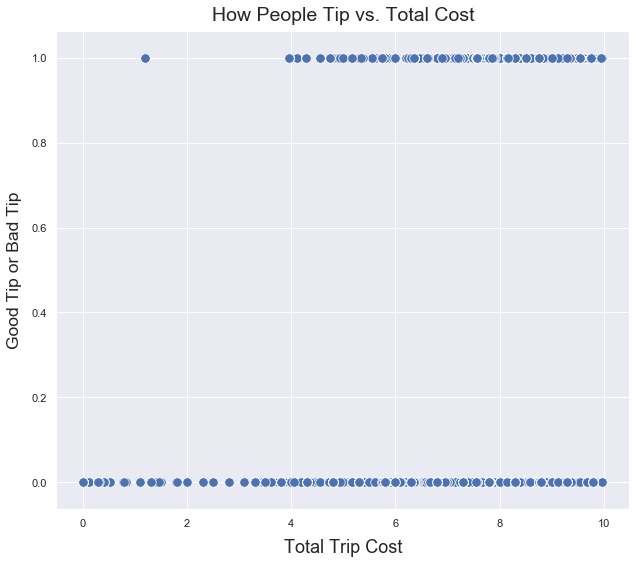

In [104]:
# looking at how people tip depending on total amount
total_to_g_n = sns.scatterplot(x = trip_data.total_amount[trip_data.total_amount<10], 
                               y = trip_data.good_or_nah[trip_data.total_amount<10],
                               s = 90)

total_to_g_n.axes.set_title('How People Tip vs. Total Cost', fontsize = 19.5, pad = 10) # title info
total_to_g_n.set_xlabel('Total Trip Cost', fontsize = 18, labelpad = 10) # xlabel info
total_to_g_n.set_ylabel('Good Tip or Bad Tip', fontsize = 17.5, labelpad = 9) # ylabel info

fig2 = total_to_g_n.get_figure()
fig2.savefig("tip_well_vs_total.png") # save as png file

#### Paying in cash to determine good tip or not

In [171]:
pay_cash = (trip_data.good_or_nah[trip_data.payment_type_2 == True]).mean()
pay_cash

# looks like if someone paid in cash, the tip would not be recorded - doesn't tell us much
# if they do pay in cash then

7.60079048221015e-05

In [172]:
pay_not_cash = (trip_data.good_or_nah[trip_data.payment_type_2 == False]).mean()
pay_not_cash

0.5684812827223382

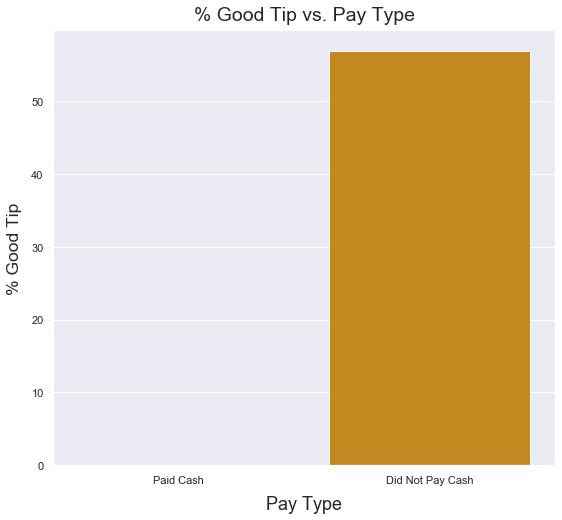

In [192]:
paytype_bar = sns.barplot(orient = 'v', 
                          y = [pay_cash*100, pay_not_cash*100], 
                          x = ['Paid Cash', 'Did Not Pay Cash'],
                          palette = 'colorblind')

paytype_bar.axes.set_title('% Good Tip vs. Pay Type', fontsize = 19.5, pad = 10) # title info
paytype_bar.set_xlabel('Pay Type', fontsize = 18, labelpad = 10) # xlabel info
paytype_bar.set_ylabel('% Good Tip', fontsize = 17.5, labelpad = 9) # ylabel info

fig4 = paytype_bar.get_figure()
fig4.savefig("percentgood_vs_paytype.png") # save as png file

#### Duration of trip - Good or not good tip

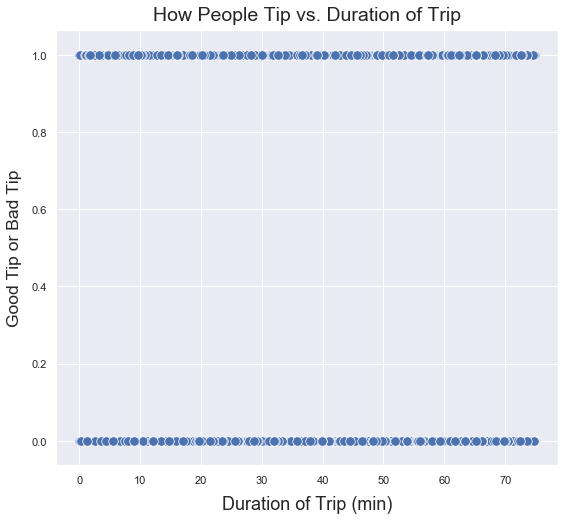

In [188]:
# looking at how people tip depending on duration of trip
duration_to_g_n = sns.scatterplot(x = trip_data.duration_s[trip_data.duration_s<4500]/60, 
                                  y = trip_data.good_or_nah[trip_data.duration_s<4500],
                                  s = 90)

duration_to_g_n.axes.set_title('How People Tip vs. Duration of Trip', fontsize = 19.5, pad = 10) # title info
duration_to_g_n.set_xlabel('Duration of Trip (min)', fontsize = 18, labelpad = 10) # xlabel info
duration_to_g_n.set_ylabel('Good Tip or Bad Tip', fontsize = 17.5, labelpad = 9) # ylabel info

fig3 = duration_to_g_n.get_figure()
fig3.savefig("tip_well_vs_duration.png") # save as png file

In [ ]:
# looking at how people tip depending on duration of trip

In [106]:
durat1 = trip_data.good_or_nah[trip_data.duration_s < 600].mean()
durat1

0.49790183185777837

In [107]:
durat2 = trip_data.good_or_nah[(trip_data.duration_s >= 600) & (trip_data.duration_s < 1200)].mean()
durat2

0.4348084005978212

In [108]:
durat3 = trip_data.good_or_nah[(trip_data.duration_s >= 1200) & (trip_data.duration_s < 1800)].mean()
durat3

0.1932701011452635

In [109]:
durat4 = trip_data.good_or_nah[(trip_data.duration_s >= 1800)].mean()
durat4

0.18348048274131362

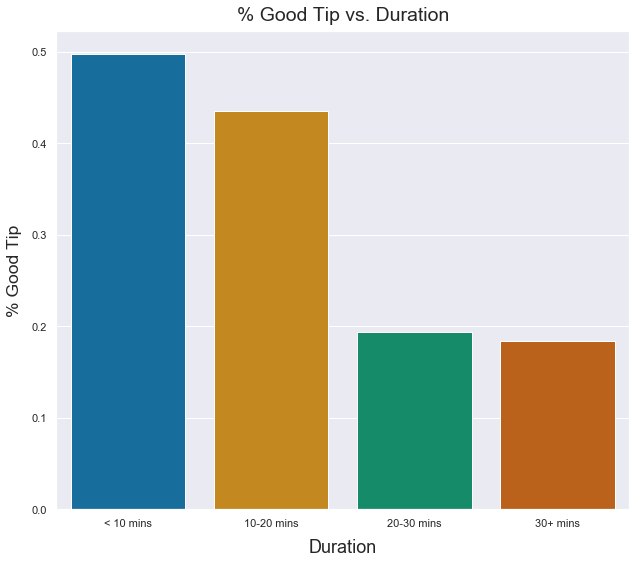

In [110]:
duration_bar = sns.barplot(orient = 'v',
                           y = [durat1,durat2,durat3,durat4],
                           x = ['< 10 mins', '10-20 mins', '20-30 mins', '30+ mins'],
                           palette = 'colorblind')

duration_bar.axes.set_title('% Good Tip vs. Duration', fontsize = 19.5, pad = 10) # title info
duration_bar.set_xlabel('Duration', fontsize = 18, labelpad = 10) # xlabel info
duration_bar.set_ylabel('% Good Tip', fontsize = 17.5, labelpad = 9) # ylabel info


fig5 = duration_bar.get_figure()
fig5.savefig("goodtip_per_duration.png") # save as png file

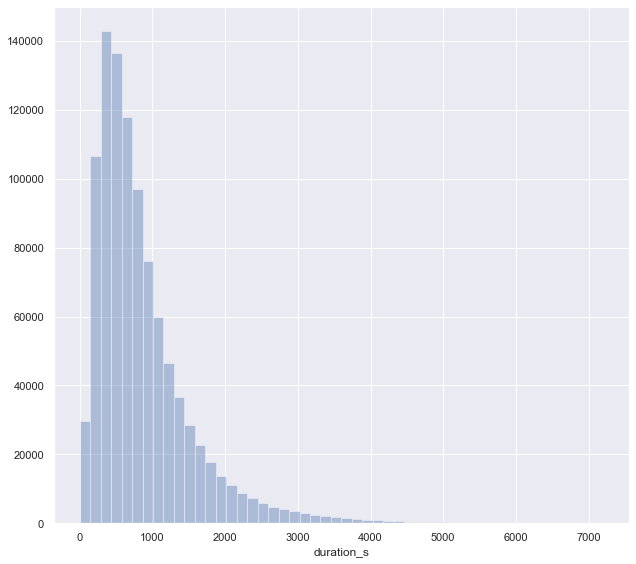

In [111]:
sns.distplot(trip_data['duration_s'][trip_data.duration_s < 7200], kde = False)

#### Duration of trip

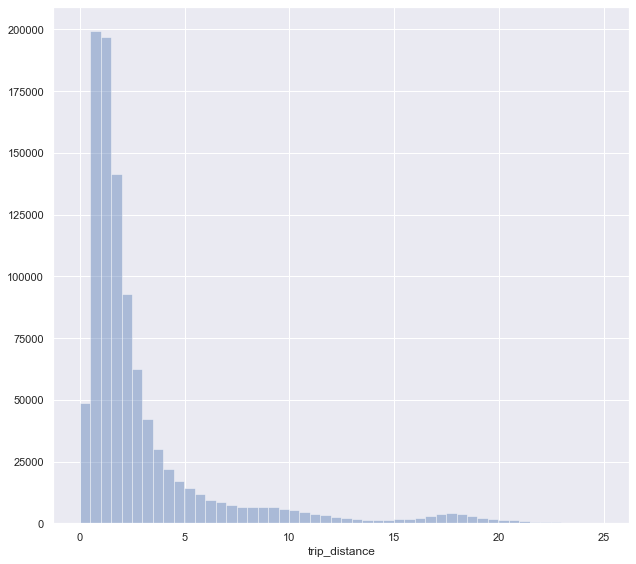

In [112]:
sns.distplot(trip_data.trip_distance[trip_data.trip_distance < 25], kde = False)

In [113]:
dist1 = trip_data.good_or_nah[trip_data.trip_distance < 0.5].mean()
dist1

0.4091979924203626

In [114]:
dist2 = trip_data.good_or_nah[(trip_data.trip_distance >= 0.5) & (trip_data.trip_distance < 1)].mean()
dist2

0.5071483072968958

In [115]:
dist3 = trip_data.good_or_nah[(trip_data.trip_distance >= 1) & (trip_data.trip_distance < 1.5)].mean()
dist3

0.5022411953041622

In [116]:
dist4 = trip_data.good_or_nah[(trip_data.trip_distance >= 1.5) & (trip_data.trip_distance < 2)].mean()
dist4

0.4789667114283695

In [117]:
dist5 = trip_data.good_or_nah[(trip_data.trip_distance >= 2) & (trip_data.trip_distance < 3)].mean()
dist5

0.42047027169680157

In [118]:
dist6 = trip_data.good_or_nah[(trip_data.trip_distance >= 3) & (trip_data.trip_distance < 4)].mean()
dist6

0.2856257488741065

In [119]:
dist7 = trip_data.good_or_nah[(trip_data.trip_distance >= 4)].mean()
dist7

0.19136567131742513

Text(0, 0.5, '% Good Tip')

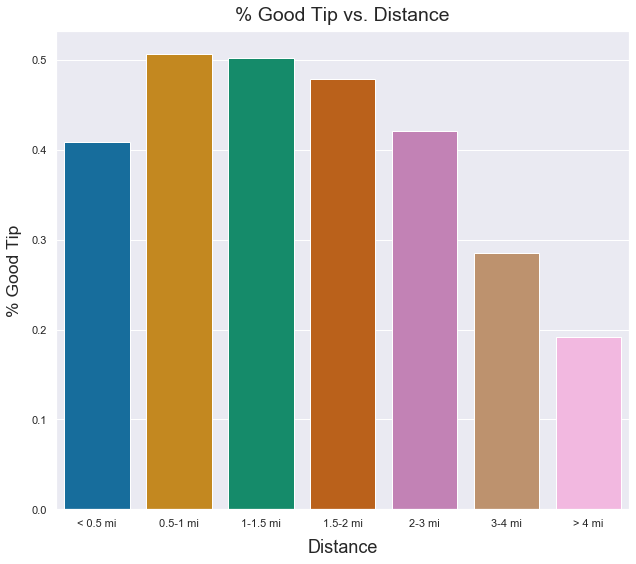

In [120]:
dist_bar = sns.barplot(orient = 'v',
                           y = [dist1,dist2,dist3,dist4,dist5,dist6,dist7],
                           x = ['< 0.5 mi', '0.5-1 mi', '1-1.5 mi', '1.5-2 mi', '2-3 mi', '3-4 mi', '> 4 mi'],
                           palette = 'colorblind')

dist_bar.axes.set_title('% Good Tip vs. Distance', fontsize = 19.5, pad = 10) # title info
dist_bar.set_xlabel('Distance', fontsize = 18, labelpad = 10) # xlabel info
dist_bar.set_ylabel('% Good Tip', fontsize = 17.5, labelpad = 9) # ylabel info

## Evaluate Random Forest Model On Test Set

In [121]:
from sklearn.metrics import accuracy_score, f1_score

In [122]:
rf_pred = rf_train_only.predict(x_test)

In [123]:
f1_score(y_test, rf_pred) # 0.945

0.9408591095575204

In [124]:
accuracy_score(y_test, rf_pred) # 0.953

0.9515981039919544

In [ ]:
## I wanted to run an XGBoost model but not enough time - dataset was too large just
## for a random forest

In [263]:
trip_data.good_or_nah[trip_data.total_amount > 4].mean()

0.4271585108145144

In [264]:
trip_data.good_or_nah[trip_data.total_amount <=4].mean()

0.019648829431438128

In [265]:
trip_data.good_or_nah.mean()

0.4261822901592077